In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pickle

%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import os

os.chdir(r"D:\desktop")

<IPython.core.display.Javascript object>

## Railway data 

We first import railraod data from natural earth, and set the coordination reference system to epsg:4326, which is a lat/lon based CRS system

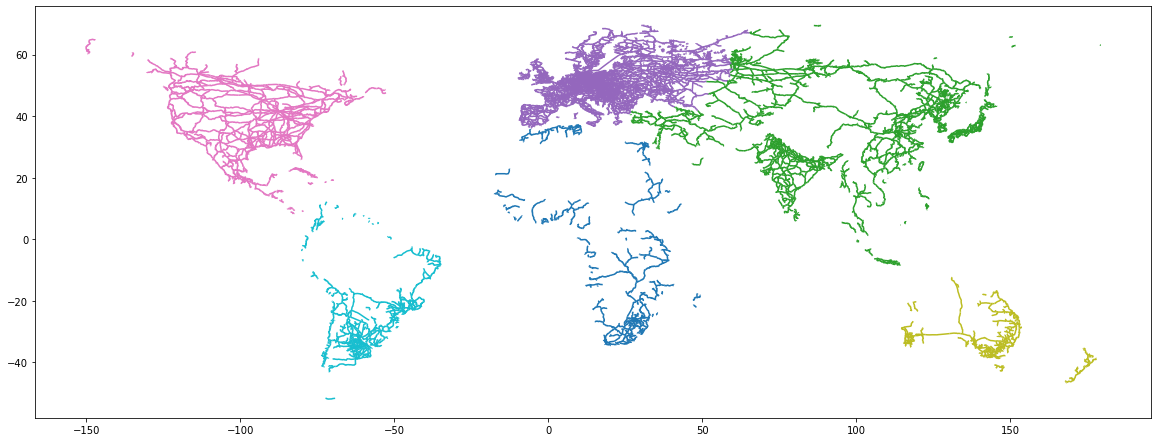

<IPython.core.display.Javascript object>

In [4]:
rail_world = gpd.read_file("ne_10m_railroads.shp")
rail_world.plot(figsize=(20, 20), column="continent")
rail_world.crs = "epsg:4326"

Extract the railway data of Asia from global railway network

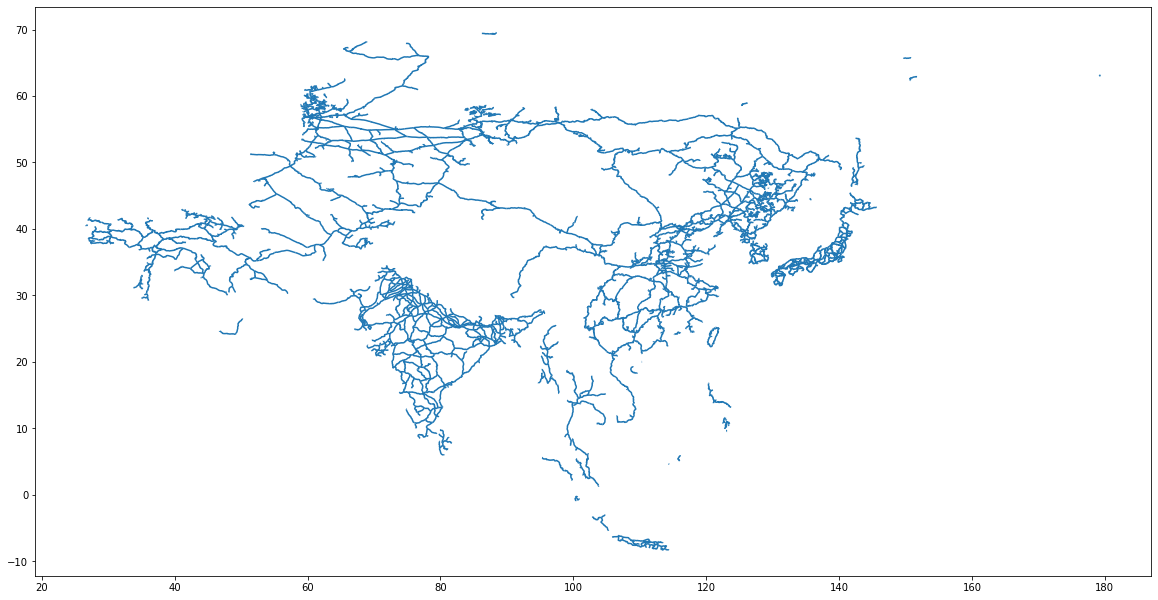

<IPython.core.display.Javascript object>

In [5]:
rail_Asia = rail_world[rail_world["continent"] == "Asia"]
rail_Asia.plot(figsize=(20, 20))

In [6]:
type(rail_Asia)

geopandas.geodataframe.GeoDataFrame

<IPython.core.display.Javascript object>

In [7]:
from shapely.geometry import LineString, Point, Polygon

<IPython.core.display.Javascript object>

In [8]:
rail_geo = rail_Asia.geometry
rail_geo

4        LINESTRING (87.66278 69.35889, 87.67722 69.361...
5        LINESTRING (87.80213 69.35534, 87.80278 69.356...
6        LINESTRING (86.23750 69.41333, 86.26028 69.412...
7        LINESTRING (87.35278 69.35083, 87.37528 69.349...
8        LINESTRING (87.78722 69.38333, 87.78945 69.383...
                               ...                        
23683    LINESTRING (113.11889 -8.24306, 113.12444 -8.2...
23684    LINESTRING (113.85222 -8.13583, 113.85778 -8.1...
23685    LINESTRING (113.20250 -8.14250, 113.20805 -8.1...
25411    LINESTRING (94.94281 36.40927, 94.89882 36.343...
25412    LINESTRING (140.35247 41.24870, 140.34557 41.2...
Name: geometry, Length: 6980, dtype: geometry

<IPython.core.display.Javascript object>

get countries' data as basemap

In [9]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
Asia = world[world["continent"] == "Asia"]
countries_in_Asia = Asia[["geometry", "name"]]
countries_in_Asia.to_crs(epsg=4326)

,geometry,name
5,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan
6,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan
8,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia
24,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656...",Timor-Leste
76,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",Israel
77,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",Lebanon
79,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",Palestine
83,"POLYGON ((35.54567 32.39399, 35.71992 32.70919...",Jordan
84,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",United Arab Emirates
85,"POLYGON ((50.81011 24.75474, 50.74391 25.48242...",Qatar


<IPython.core.display.Javascript object>

find China in the basemap

In [10]:
CHN_adm = world[world["name"] == "China"]
CHN_adm.to_crs(epsg=4326)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
139,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


<IPython.core.display.Javascript object>

In [11]:
CHN_adm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<IPython.core.display.Javascript object>

spatial join of railway data with the basemap 

In [12]:
%%time
rail_sjoin = gpd.sjoin(rail_Asia,CHN_adm, how="inner", op='within')
rail_sjoin.crs

Wall time: 985 ms


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<IPython.core.display.Javascript object>

find China's railway data

In [13]:
rail_CHN = rail_sjoin
rail_CHN.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<IPython.core.display.Javascript object>

In [13]:
# length of linestring object
rail_CHN_m = rail_CHN.to_crs(epsg=32643)  # change measurement into meters
rail_CHN_length = rail_CHN_m.geometry.length  # return a Series Object
rail_CHN_length

8543     3.433585e+05
8544     1.242981e+05
8585     7.233692e+04
8595     1.563754e+04
9286     8.977036e+03
             ...     
22822    6.921869e+03
22893    4.821394e+04
22925    1.837839e+05
22926    7.263517e+03
25411    1.072323e+06
Length: 2831, dtype: float64

<IPython.core.display.Javascript object>

## Mining sites data 

In [14]:
zipfile = r"E:\tencent files\chrome Download\Research\LCA\LCA Coal_fired power plant phaseout\data\AllChinaCoalMines\AllChinaCoalMines.shp"
mine = gpd.read_file(zipfile)

<IPython.core.display.Javascript object>

In [15]:
mine.to_crs(epsg=4326)

,IDNum,Province,PrefMunCty,CntyDstCty,LatDD,LongDD,Rank,MineSize,MineName,geometry
0,1.0,Anhui Province,Suzhou City,Dangshan County,34.331641,116.482994,Bituminous,Large,Dang shan,POINT (116.48299 34.33164)
1,2.0,Anhui Province,Suzhou City,Xiao County,34.250348,116.596540,Bituminous,Small,Zhang datun,POINT (116.59654 34.25035)
2,3.0,Anhui Province,Suzhou City,Xiao County,34.130176,116.787770,Bituminous,Medium,Tang miao,POINT (116.78777 34.13018)
3,4.0,Anhui Province,Huaibei City,None,34.023946,116.831329,Bituminous,Medium,Dai he,POINT (116.83133 34.02395)
4,5.0,Anhui Province,Huaibei City,None,34.061551,116.887518,Bituminous,Medium,Shuo li,POINT (116.88752 34.06155)
...,...,...,...,...,...,...,...,...,...,...
2435,33.0,Zhejiang Province,Quzhou City,Kaihua County,28.997537,118.412750,Bituminous,Small,Ye jia tang,POINT (118.41275 28.99754)
2436,34.0,Zhejiang Province,Quzhou City,Changshan County,28.875816,118.319549,Bituminous,Small,Qiu chuan,POINT (118.31955 28.87582)
2437,36.0,Zhejiang Province,Quzhou City,Jiangshan City,28.622900,118.546941,Bituminous,Small,Dao tang shan,POINT (118.54694 28.62290)
2438,37.0,Zhejiang Province,Quzhou City,Jiangshan City,28.585673,118.475607,Bituminous,Small,Zheng tang,POINT (118.47561 28.58567)


<IPython.core.display.Javascript object>

In [16]:
mine.crs

<Geographic 2D CRS: EPSG:4214>
Name: Beijing 1954
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: China
- bounds: (73.62, 16.7, 134.77, 53.56)
Datum: Beijing 1954
- Ellipsoid: Krassowsky 1940
- Prime Meridian: Greenwich

<IPython.core.display.Javascript object>

In [17]:
mine_site = gpd.sjoin(mine, CHN_adm, how="inner", op="within")
len(mine_site)

E:\ProgramData\Anaconda3\envs\Geodata\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(epsg:4214 != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


2412

<IPython.core.display.Javascript object>

## Power Plant 

In [78]:
dir_coal = r"E:\tencent files\chrome Download\Research\LCA\LCA Coal_fired power plant phaseout\data\coal_transport2014"

<IPython.core.display.Javascript object>

In [79]:
power_sd = pd.read_excel(
    os.path.join(dir_coal, "coal_elec_gen2014_SD.xlsx"), sheet_name="2014电厂数据"
)

<IPython.core.display.Javascript object>

In [80]:
len(power_sd)

133

<IPython.core.display.Javascript object>

In [81]:
power_sd_gdf = gpd.GeoDataFrame(
    power_sd, geometry=gpd.points_from_xy(power_sd.longitude, power_sd.latitude)
)
power_sd_gdf.crs = "epsg:4326"
power_sd_gdf.head()

,总序号,省序号,厂序号,省份,电厂,区划代码,地级市/自治州,发电类别,年末发电设备容量\n（千瓦）,发电量\n（万千瓦时）,发电设备平均利用小时\n（小时）,发电厂用电率\n（%）,发电标准煤耗\r\n（克/千瓦时）,供电标准煤耗率\n（克/千瓦时）,发电耗用原煤量\n（吨）,longitude,latitude,geometry
0,3402,15,89,山东省,良庄电厂,370400,枣庄市,NaN,15000.0,8116.0,5411.0,14.7,277,325,31473.218536,117.639872,34.677122,POINT (117.63987 34.67712)
1,3405,15,92,山东省,聊城蓝天热电有限公司,371500,聊城市,NaN,25000.0,17010.0,6804.0,5.0,204,215,42677.000000,116.066959,36.478815,POINT (116.06696 36.47882)
2,3409,15,96,山东省,临清热电厂,371500,聊城市,NaN,24000.0,4552.0,1897.0,7.6,342,370,18745.000000,115.711470,36.844289,POINT (115.71147 36.84429)
3,3411,15,98,山东省,临清银河纸业,371500,聊城市,NaN,69000.0,7419.0,1075.0,2.5,347,356,36077.000000,115.711470,36.844289,POINT (115.71147 36.84429)
4,3412,15,99,山东省,临清运河热电厂,371500,聊城市,NaN,100000.0,44545.0,4454.0,8.7,334,366,201615.000000,116.838612,38.316523,POINT (116.83861 38.31652)


<IPython.core.display.Javascript object>

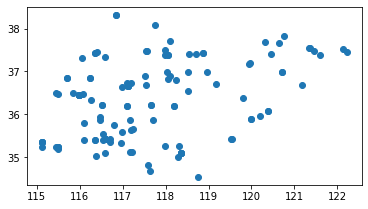

<IPython.core.display.Javascript object>

In [82]:
power_sd_gdf.plot()

## Link point

### Link Mines to Rails

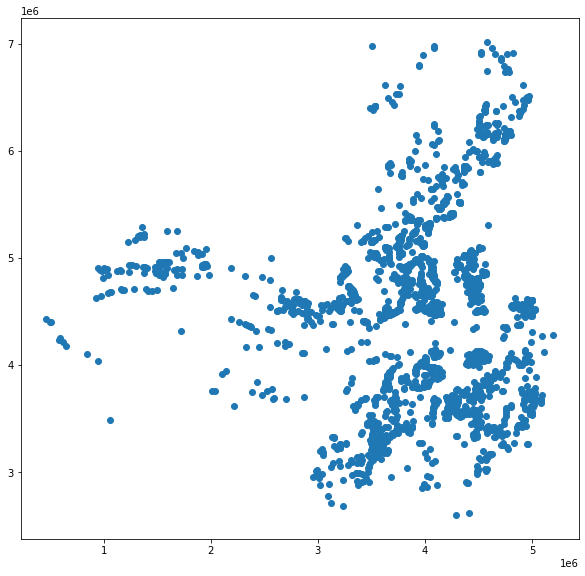

<IPython.core.display.Javascript object>

In [83]:
mine_site_m = mine_site.to_crs(epsg=32643)
mine_site_m.plot(figsize=(10, 10))

In [84]:
# transform LineString into MultiLineString
from shapely.geometry import MultiLineString, LineString

rail_MLS = [rail for rail in rail_CHN_m.geometry]
rail_MLS_temp = MultiLineString(rail_MLS)

<IPython.core.display.Javascript object>

In [85]:
# calculate shortest distance from mine site to the railway (use shapely.ops.nearest_points function)
from shapely.ops import nearest_points

shortest_distance_ls = []
intersection_point_ls = []
for site in mine_site_m.geometry:
    shortest_distance = site.distance(rail_MLS_temp)
    intersection_point = nearest_points(site, rail_MLS_temp)[1]
    shortest_distance_ls.append(shortest_distance)
    intersection_point_ls.append(intersection_point)

<IPython.core.display.Javascript object>

In [86]:
inter_point_gdf = gpd.GeoDataFrame(
    intersection_point_ls, index=mine_site_m.index, columns=["intersection_point"]
)
shortest_distance_gdf = pd.Series(shortest_distance_ls)
inter_point_gdf.head()

,intersection_point
0,POINT (4417515.434006381 4700653.08348814)
1,POINT (4427241.652733594 4677623.711441736)
2,POINT (4473556.785094056 4681011.935077398)
3,POINT (4473716.618763026 4674715.588216955)
4,POINT (4473895.413770912 4682052.625455537)


<IPython.core.display.Javascript object>

In [87]:
join_mine = mine_site_m.join(inter_point_gdf)
join_mine.head()

,IDNum,Province,PrefMunCty,CntyDstCty,LatDD,LongDD,Rank,MineSize,MineName,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est,intersection_point
0,1.0,Anhui Province,Suzhou City,Dangshan County,34.331641,116.482994,Bituminous,Large,Dang shan,POINT (4420001.204 4693619.627),139,1379302771,Asia,China,CHN,21140000.0,POINT (4417515.434006381 4700653.08348814)
1,2.0,Anhui Province,Suzhou City,Xiao County,34.250348,116.596540,Bituminous,Small,Zhang datun,POINT (4436002.573 4689567.753),139,1379302771,Asia,China,CHN,21140000.0,POINT (4427241.652733594 4677623.711441736)
2,3.0,Anhui Province,Suzhou City,Xiao County,34.130176,116.787770,Bituminous,Medium,Tang miao,POINT (4462033.414 4684761.125),139,1379302771,Asia,China,CHN,21140000.0,POINT (4473556.785094056 4681011.935077398)
3,4.0,Anhui Province,Huaibei City,None,34.023946,116.831329,Bituminous,Medium,Dai he,POINT (4472687.649 4674292.627),139,1379302771,Asia,China,CHN,21140000.0,POINT (4473716.618763026 4674715.588216955)
4,5.0,Anhui Province,Huaibei City,None,34.061551,116.887518,Bituminous,Medium,Shuo li,POINT (4476003.935 4681563.485),139,1379302771,Asia,China,CHN,21140000.0,POINT (4473895.413770912 4682052.625455537)


<IPython.core.display.Javascript object>

In [88]:
link_mine = join_mine.apply(
    lambda row: LineString([row["geometry"], row["intersection_point"]]), axis=1
)
link_mine.head()

0    LINESTRING (4420001.203680727 4693619.62732239...
1    LINESTRING (4436002.57311189 4689567.753009823...
2    LINESTRING (4462033.413644917 4684761.12485657...
3    LINESTRING (4472687.648689089 4674292.62680581...
4    LINESTRING (4476003.935470512 4681563.48490386...
dtype: object

<IPython.core.display.Javascript object>

In [89]:
join_mine["length"] = join_mine.apply(
    lambda row: LineString([row["geometry"], row["intersection_point"]]).length, axis=1
)

<IPython.core.display.Javascript object>

In [90]:
join_mine.head(3)

,IDNum,Province,PrefMunCty,CntyDstCty,LatDD,LongDD,Rank,MineSize,MineName,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est,intersection_point,length
0,1.0,Anhui Province,Suzhou City,Dangshan County,34.331641,116.482994,Bituminous,Large,Dang shan,POINT (4420001.204 4693619.627),139,1379302771,Asia,China,CHN,21140000.0,POINT (4417515.434006381 4700653.08348814),7459.796010
1,2.0,Anhui Province,Suzhou City,Xiao County,34.250348,116.596540,Bituminous,Small,Zhang datun,POINT (4436002.573 4689567.753),139,1379302771,Asia,China,CHN,21140000.0,POINT (4427241.652733594 4677623.711441736),14812.624847
2,3.0,Anhui Province,Suzhou City,Xiao County,34.130176,116.787770,Bituminous,Medium,Tang miao,POINT (4462033.414 4684761.125),139,1379302771,Asia,China,CHN,21140000.0,POINT (4473556.785094056 4681011.935077398),12117.941804


<IPython.core.display.Javascript object>

### link power plant to rail

In [91]:
power_sd_m = power_sd_gdf.to_crs(epsg=32643)
power_sd_m.head()

,总序号,省序号,厂序号,省份,电厂,区划代码,地级市/自治州,发电类别,年末发电设备容量\n（千瓦）,发电量\n（万千瓦时）,发电设备平均利用小时\n（小时）,发电厂用电率\n（%）,发电标准煤耗\r\n（克/千瓦时）,供电标准煤耗率\n（克/千瓦时）,发电耗用原煤量\n（吨）,longitude,latitude,geometry
0,3402,15,89,山东省,良庄电厂,370400,枣庄市,NaN,15000.0,8116.0,5411.0,14.7,277,325,31473.218536,117.639872,34.677122,POINT (4512470.078 4792635.290)
1,3405,15,92,山东省,聊城蓝天热电有限公司,371500,聊城市,NaN,25000.0,17010.0,6804.0,5.0,204,215,42677.000000,116.066959,36.478815,POINT (4251798.074 4925077.294)
2,3409,15,96,山东省,临清热电厂,371500,聊城市,NaN,24000.0,4552.0,1897.0,7.6,342,370,18745.000000,115.711470,36.844289,POINT (4196716.106 4950223.558)
3,3411,15,98,山东省,临清银河纸业,371500,聊城市,NaN,69000.0,7419.0,1075.0,2.5,347,356,36077.000000,115.711470,36.844289,POINT (4196716.106 4950223.558)
4,3412,15,99,山东省,临清运河热电厂,371500,聊城市,NaN,100000.0,44545.0,4454.0,8.7,334,366,201615.000000,116.838612,38.316523,POINT (4209065.725 5174330.123)


<IPython.core.display.Javascript object>

In [92]:
intersection_point = nearest_points(power_sd_m.geometry[1], rail_MLS_temp)
print(intersection_point[0])

POINT (4251798.073542284 4925077.293812496)


<IPython.core.display.Javascript object>

In [93]:
shortest_distance_Power_ls = []
intersection_point_Power_ls = []
for site in power_sd_m.geometry:
    shortest_distance = site.distance(rail_MLS_temp)
    intersection_point = nearest_points(site, rail_MLS_temp)[1]
    shortest_distance_Power_ls.append(shortest_distance)
    intersection_point_Power_ls.append(intersection_point)

<IPython.core.display.Javascript object>

In [94]:
inter_point_Power_gdf = gpd.GeoDataFrame(
    intersection_point_Power_ls, index=power_sd_m.index, columns=["intersection_point"]
)
shortest_distance_Power_gdf = pd.Series(shortest_distance_ls)
inter_point_Power_gdf.head()

,intersection_point
0,POINT (4491923.209869342 4811049.163410538)
1,POINT (4308026.107918465 4915534.784496429)
2,POINT (4176564.455838533 4891271.468177193)
3,POINT (4176564.455838533 4891271.468177193)
4,POINT (4212979.620189762 5175380.658519772)


<IPython.core.display.Javascript object>

In [95]:
join_Power = power_sd_m.join(inter_point_Power_gdf)
join_Power["发电耗用原煤量\n（吨）"].sum()

124333271.30295394

<IPython.core.display.Javascript object>

In [96]:
len(join_Power)

133

<IPython.core.display.Javascript object>

In [97]:
link_Power = join_Power.apply(
    lambda row: LineString([row["geometry"], row["intersection_point"]]), axis=1
)
link_Power.head()

0    LINESTRING (4512470.078077624 4792635.29045680...
1    LINESTRING (4251798.073542284 4925077.29381249...
2    LINESTRING (4196716.106017192 4950223.55754386...
3    LINESTRING (4196716.106017192 4950223.55754386...
4    LINESTRING (4209065.725367893 5174330.12302600...
dtype: object

<IPython.core.display.Javascript object>

In [98]:
join_Power["length"] = join_Power.apply(
    lambda row: LineString([row["geometry"], row["intersection_point"]]).length, axis=1
)

<IPython.core.display.Javascript object>

In [99]:
join_Power.head()

,总序号,省序号,厂序号,省份,电厂,区划代码,地级市/自治州,发电类别,年末发电设备容量\n（千瓦）,发电量\n（万千瓦时）,发电设备平均利用小时\n（小时）,发电厂用电率\n（%）,发电标准煤耗\r\n（克/千瓦时）,供电标准煤耗率\n（克/千瓦时）,发电耗用原煤量\n（吨）,longitude,latitude,geometry,intersection_point,length
0,3402,15,89,山东省,良庄电厂,370400,枣庄市,NaN,15000.0,8116.0,5411.0,14.7,277,325,31473.218536,117.639872,34.677122,POINT (4512470.078 4792635.290),POINT (4491923.209869342 4811049.163410538),27590.659839
1,3405,15,92,山东省,聊城蓝天热电有限公司,371500,聊城市,NaN,25000.0,17010.0,6804.0,5.0,204,215,42677.000000,116.066959,36.478815,POINT (4251798.074 4925077.294),POINT (4308026.107918465 4915534.784496429),57032.020251
2,3409,15,96,山东省,临清热电厂,371500,聊城市,NaN,24000.0,4552.0,1897.0,7.6,342,370,18745.000000,115.711470,36.844289,POINT (4196716.106 4950223.558),POINT (4176564.455838533 4891271.468177193),62301.186551
3,3411,15,98,山东省,临清银河纸业,371500,聊城市,NaN,69000.0,7419.0,1075.0,2.5,347,356,36077.000000,115.711470,36.844289,POINT (4196716.106 4950223.558),POINT (4176564.455838533 4891271.468177193),62301.186551
4,3412,15,99,山东省,临清运河热电厂,371500,聊城市,NaN,100000.0,44545.0,4454.0,8.7,334,366,201615.000000,116.838612,38.316523,POINT (4209065.725 5174330.123),POINT (4212979.620189762 5175380.658519772),4052.431061


<IPython.core.display.Javascript object>

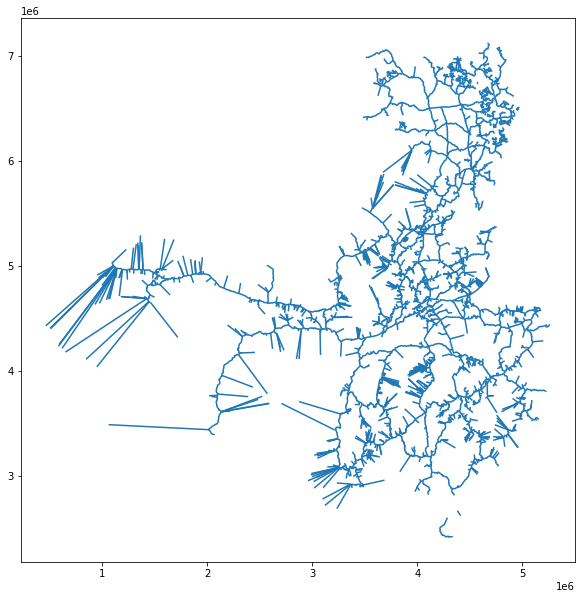

<IPython.core.display.Javascript object>

In [100]:
mine_MLS = [link for link in link_mine]
power_MLS = [link for link in link_Power]
link_mine_rail_power = gpd.GeoSeries(rail_MLS + mine_MLS + power_MLS)
link_mine_rail_power.plot(figsize=(10, 10))

In [101]:
link_mine_rail_power.geometry.to_file(
    r"E:\tencent files\chrome Download\Research\LCA\LCA Coal_fired power plant phaseout\data\shp\link.shp"
)

<IPython.core.display.Javascript object>

## Transform geospatial information into topology graph and calculate distance

### Transform shape file into topology graph and find nodes and edges

In [102]:
import s2g

<IPython.core.display.Javascript object>

In [103]:
links = s2g.ShapeGraph(
    shapefile=r"E:\tencent files\chrome Download\Research\LCA\LCA Coal_fired power plant phaseout\data\shp\link.shp",
    to_graph=True,
)

INFO:root:Validating pair-wise line connections of raw shapefiles (total 5376 lines)
100% (14448000 of 14448000) |############| Elapsed Time: 1:43:25 Time:  1:43:25


Major components statistics:
	Total components: 10
	Component size: max 5287, median 7.5, min 2, average 537.4
	Top comp. sizes: 5287 34 16 10 9 6 4 4 2 2


INFO:root:Processing the largest component with 5287 lines
INFO:root:Cutting lines with specific resolution = 1.0 km
100% (5287 of 5287) |####################| Elapsed Time: 0:00:23 Time:  0:00:23
INFO:root:Adding pseudo edges to eliminate gaps between edges
INFO:root:Graph created with 119653 nodes, 119445 edges


<IPython.core.display.Javascript object>

In [104]:
with open(
    r"E:\tencent files\chrome Download\Research\LCA\LCA Coal_fired power plant phaseout\data\shp\link_2014.pickle",
    "wb",
) as file:
    pickle.dump(links, file)

<IPython.core.display.Javascript object>

In [105]:
with open(
    r"E:\tencent files\chrome Download\Research\LCA\LCA Coal_fired power plant phaseout\data\shp\link_2014.pickle",
    "rb",
) as file:
    links = pickle.load(file)

<IPython.core.display.Javascript object>

In [106]:
link_graph = links.to_networkx()

INFO:root:Processing the largest component with 5287 lines
INFO:root:Cutting lines with specific resolution = 1.0 km
100% (5287 of 5287) |####################| Elapsed Time: 0:00:01 Time:  0:00:01
INFO:root:Adding pseudo edges to eliminate gaps between edges
INFO:root:Graph created with 119653 nodes, 119445 edges


<IPython.core.display.Javascript object>

In [107]:
nx.set_node_attributes(link_graph, links.node_xy, "node_xy")

<IPython.core.display.Javascript object>

### Calculate distances

In [108]:
mine_site_tuple = [tuple(np.array(i)) for i in list(mine_site_m.geometry)]
power_tuple = [tuple(np.array(i)) for i in list(power_sd_m.geometry)]

<IPython.core.display.Javascript object>

Find nodes of power plants in the graph

In [109]:
selected_nodes_mine = [
    n for n, v in link_graph.nodes(data="node_xy") if v in mine_site_tuple
]

<IPython.core.display.Javascript object>

In [110]:
selected_nodes_power = [
    n for n, v in link_graph.nodes(data="node_xy") if v in power_tuple
]

<IPython.core.display.Javascript object>

Find coordinations of nodes

In [111]:
selected_nodes_mine_coor = pd.Series(
    [Point(link_graph.nodes[i]["node_xy"]) for i in selected_nodes_mine]
)

<IPython.core.display.Javascript object>

In [112]:
selected_nodes_power_coor = pd.Series(
    [Point(link_graph.nodes[i]["node_xy"]) for i in selected_nodes_power]
)

<IPython.core.display.Javascript object>

Merge nodes and geospatial points of power plants and mines

In [113]:
node_gdf_mine = gpd.GeoDataFrame(
    pd.concat(
        [pd.Series(selected_nodes_mine), selected_nodes_mine_coor], axis=1
    ).rename(columns={0: "node_id", 1: "geometry"})
)
node_gdf_mine.crs = "epsg:32643"

<IPython.core.display.Javascript object>

In [114]:
node_gdf_power = gpd.GeoDataFrame(
    pd.concat(
        [pd.Series(selected_nodes_power), selected_nodes_power_coor], axis=1
    ).rename(columns={0: "node_id", 1: "geometry"})
)
node_gdf_power.crs = "epsg:32643"

<IPython.core.display.Javascript object>

Export results

In [115]:
node_mine_gdf = pd.merge(join_mine, node_gdf_mine, on=["geometry"])
node_mine_gdf.to_excel(os.path.join(dir_coal, "node_mine_pair.xlsx"))

<IPython.core.display.Javascript object>

In [116]:
node_power_gdf = pd.merge(join_Power, node_gdf_power, on=["geometry"])
node_power_gdf.to_excel(os.path.join(dir_coal, "node_power_pair.xlsx"))

<IPython.core.display.Javascript object>

Find shortest path between mines and power plants using nx.shortest_path function

In [117]:
def get_path(graph, source_node, target_node):
    route = nx.shortest_path(G=link_graph, source=source_node, target=target_node)
    coord_ls = []
    for i in range(len(route)):
        coord = Point(link_graph.nodes[route[i]]["node_xy"])
        coord_ls.append(coord)
    path = gpd.GeoSeries(LineString(coord_ls))
    path.crs = "epsg:32643"
    path_length = path.length
    return path, path_length

<IPython.core.display.Javascript object>

In [118]:
if not os.path.exists("Distance_matrix"):
    os.mkdir("Distance_matrix")
os.chdir("Distance_matrix")

<IPython.core.display.Javascript object>

In [119]:
def distance_power_to_mine(power_node):
    path_ls = []
    path_length_ls = []
    for i in range(len(selected_nodes_mine)):
        path, path_length = get_path(link_graph, selected_nodes_mine[i], power_node)
        path_ls.append(path)
        path_length_ls.append(path_length)
    path_df = pd.concat(path_ls)
    path_length_df = pd.concat(path_length_ls)
    path_gdf = gpd.GeoDataFrame(pd.concat([path_df, path_length_df], axis=1)).rename(
        columns={0: "geometry", 1: "path_length"}
    )
    with open(str(power_node) + ".pickle", "wb") as data:
        pickle.dump(path_gdf, data)

<IPython.core.display.Javascript object>

In [120]:
%%time
for i in range(0,len(selected_nodes_power)):
    distance_power_to_mine(selected_nodes_power[i])

Wall time: 6h 44min 56s


<IPython.core.display.Javascript object>

In [ ]:
path1 = path_gdf.to_crs(epsg=4326)
ax = path1.plot()
CHN_adm.plot(ax=ax, facecolor="none", edgecolor="k", linewidth=3)

In [ ]:
link_gdf = gpd.GeoDataFrame(link_mine_rail_power, columns=["geometry"] in list(mine_site_m))
link_gdf.crs = "epsg:32643"

find all the nodes corresponding to mines so that we can acquire node id in the graph

In [ ]:
node_Power_ls = []
for loc in power_sd_m["geometry"]:
    temp = nodes[nodes["geometry"] == loc]
    node_Power_ls.append(temp)

nodes_power = gpd.GeoDataFrame(pd.concat(node_Power_ls))

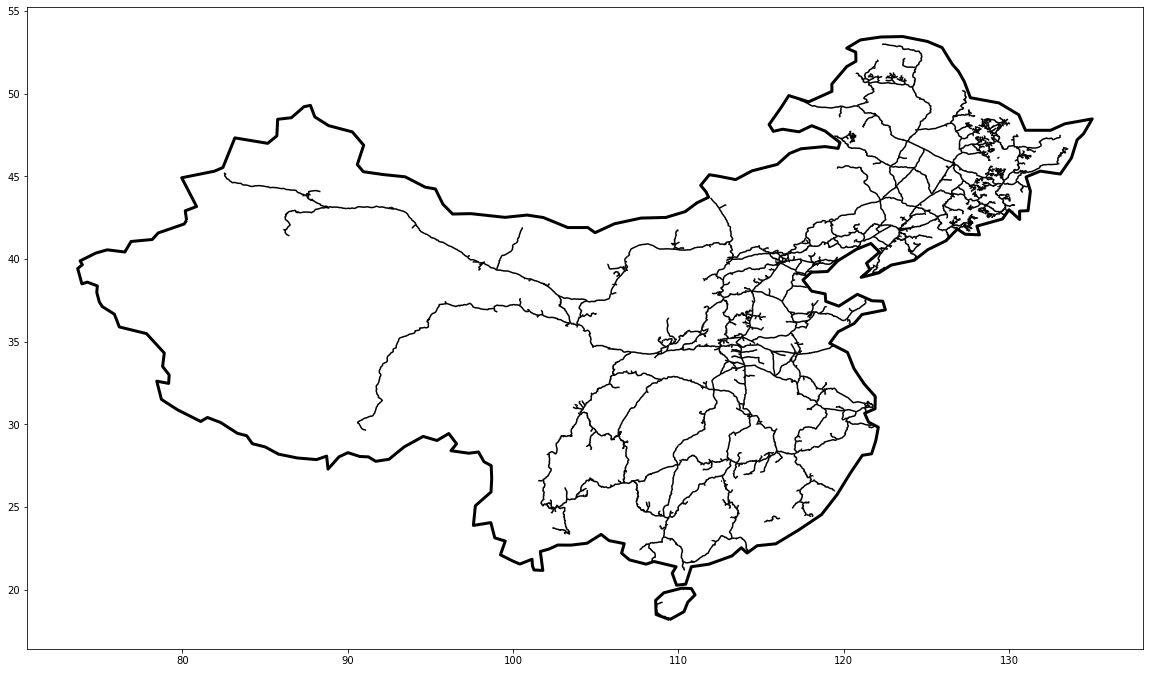

<IPython.core.display.Javascript object>

In [14]:
ax = rail_CHN.plot(figsize=(20, 20), edgecolor="k", linewidth=1.5)
CHN_adm.plot(ax=ax, figsize=(20, 20), facecolor="none", edgecolor="k", linewidth=3)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\LCA\LCA Coal_fired power plant phaseout\Figures\trans_network.png",
    transparent=True,
    bbox_inches="tight",
)